In [1]:
import math


def endurance(value: list[float]) -> float:
    x, y, z, u, v, w = value
    return math.exp(-2*(y-math.sin(x))**2) + math.sin(z*u) + math.cos(v*w)


In [2]:
def forward_prop(values: list[list[float]]) -> list[float]:
    endurances = []
    for value in values:
        endurances.append(-endurance(value))
    return endurances

In [3]:
import pyswarms as ps
import numpy as np

options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

x_max = np.ones(6)
x_min = np.zeros(6)
my_bounds = (x_min, x_max)

optimizer = ps.single.GlobalBestPSO(
    n_particles=10, dimensions=6, options=options, bounds=my_bounds)
optimizer.optimize(forward_prop, iters=100)


2023-03-29 14:15:26,860 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=-2.82
2023-03-29 14:15:26,922 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -2.819513260667432, best pos: [0.72599955 0.61587056 0.99121539 0.98972349 0.76770403 0.15374024]


(-2.819513260667432,
 array([0.72599955, 0.61587056, 0.99121539, 0.98972349, 0.76770403,
        0.15374024]))

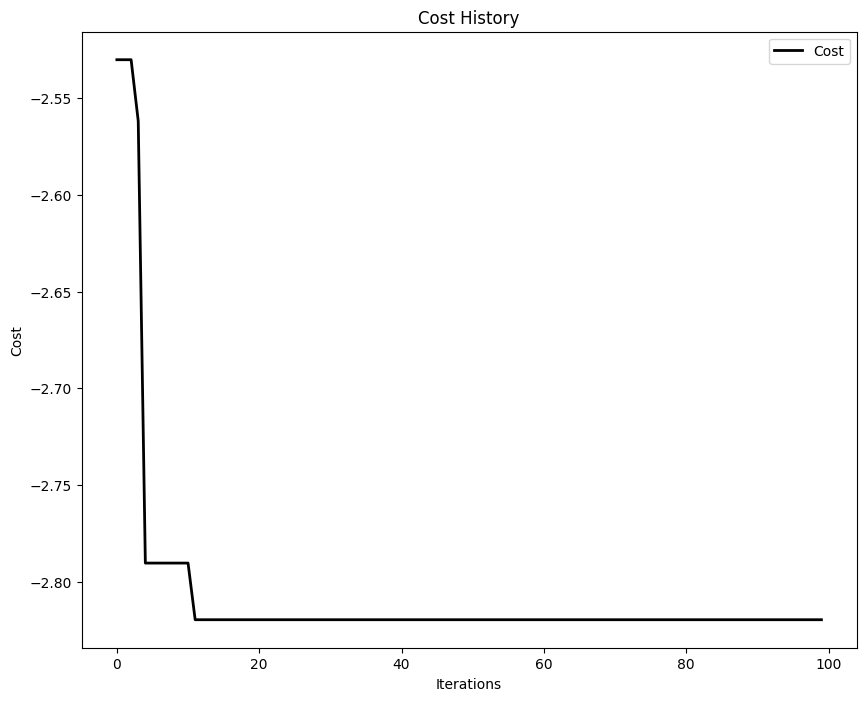

In [4]:
from pyswarms.utils.plotters import plot_cost_history
import matplotlib.pyplot as plt

cost_history = optimizer.cost_history

plot_cost_history(cost_history)
plt.show()